# Test OWC Python software

In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import xarray as xr

# Importing pyowc in dev mode:
# sys.path.insert(0, "/Users/gmaze/git/github/gmaze/owc-software-python")
# import owc_calibration

# Otherwise from binder, it should already be installed

In [2]:
from owc_calibration.load_configuration.load_configuration import load_configuration
from owc_calibration.update_salinity_mapping.update_salinity_mapping import update_salinity_mapping

## Run calibration

### Set-up parameters

In [3]:
# store name for profile
FLOAT_NAME = "3901960"

# fetch the configuration and parameters set by the user
USER_CONFIG = load_configuration()

# Update path of data folder:
# USER_CONFIG['FLOAT_SOURCE_DIRECTORY'] = os.path.sep.join([os.path.split(owc_calibration.__file__)[0].replace('owc_calibration','') + 'data','float_source'])
for k in USER_CONFIG:
    if "DIRECTORY" in k and "data/" in USER_CONFIG[k][0:5]:
        print("%30s: %s" % (k, USER_CONFIG[k]))
        USER_CONFIG[k] = USER_CONFIG[k].replace("data/", os.path.split(owc_calibration.__file__)[0].replace('owc_calibration','') + 'data/')
print("\n")
for k in USER_CONFIG:
    print("%30s: %s" % (k, USER_CONFIG[k]))

          HISTORICAL_DIRECTORY: data/climatology
        FLOAT_SOURCE_DIRECTORY: data/float_source
        FLOAT_MAPPED_DIRECTORY: data/float_mapped/
              CONFIG_DIRECTORY: data/constants/


          HISTORICAL_DIRECTORY: /Users/gmaze/git/github/gmaze/owc-software-python/data/climatology
         HISTORICAL_CTD_PREFIX: /historical_ctd/ctd_
      HISTORICAL_BOTTLE_PREFIX: /historical_bot/bot_
        HISTORICAL_ARGO_PREFIX: /historical_argo/argo_
        FLOAT_SOURCE_DIRECTORY: /Users/gmaze/git/github/gmaze/owc-software-python/data/float_source
          FLOAT_SOURCE_POSTFIX: .mat
        FLOAT_MAPPED_DIRECTORY: /Users/gmaze/git/github/gmaze/owc-software-python/data/float_mapped/
           FLOAT_MAPPED_PREFIX: map_
          FLOAT_MAPPED_POSTFIX: .mat
         FLOAT_CALIB_DIRECTORY: /home/awong/argo/OW/data/float_calib/
            FLOAT_CALIB_PREFIX: cal_
        FLOAT_CALSERIES_PREFIX: calseries_
           FLOAT_CALIB_POSTFIX: .mat
         FLOAT_PLOTS_DIRECTORY: /home/awo

## Get historical salinity data for comparison and compute calibration

In [4]:
update_salinity_mapping("/", FLOAT_NAME, USER_CONFIG)


CONFIGURATION PARAMETERS
__________________________________________________________
WMO box file:  wmo_boxes.mat
max_casts:  300
map_use_pv:  0
map_use_saf:  0
long_large:  8
long_small:  4
lat_large:  4
lat_small:  2
phi_large:  0.5
phi_small:  0.1
map_age_large:  20
map_age_small:  10
map_p_delta:  250
map_p_exclude:  200
__________________________________________________________
Using precaulcated data:  /Users/gmaze/git/github/gmaze/owc-software-python/data/float_mapped//map_3901960.mat
__________________________________________________________


/Users/gmaze/git/github/gmaze/owc-software-python/owc_calibration/update_salinity_mapping/update_salinity_mapping.py:488: RuntimeWarning: invalid value encountered in less
  bad_sal_30 = np.argwhere(la_mapped_sal < 30)
/Users/gmaze/git/github/gmaze/owc-software-python/owc_calibration/update_salinity_mapping/update_salinity_mapping.py:489: RuntimeWarning: invalid value encountered in greater
  bad_sal_40 = np.argwhere(la_mapped_sal > 40)


## Plots

In [5]:
from owc_calibration.plot_diagnostics.plot_diagnostics import plot_diagnostics

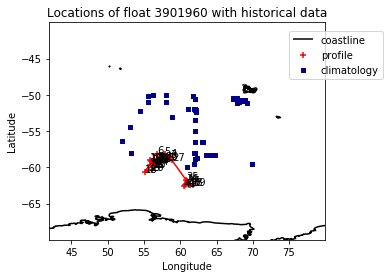

In [6]:
# create the diagnostic plots
plot_diagnostics("/", FLOAT_NAME, USER_CONFIG)